## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [174]:
!pip install sklearn

In [175]:
%matplotlib inline

##### **(1) 生成数据**

In [176]:
import numpy as np

In [177]:
random_data = np.random.random((20, 2))

In [178]:
random_data

array([[0.15695203, 0.99317009],
       [0.67394119, 0.82904306],
       [0.7447616 , 0.39620057],
       [0.69796553, 0.88073442],
       [0.07818826, 0.1524215 ],
       [0.82894514, 0.32392741],
       [0.24866651, 0.581326  ],
       [0.22491619, 0.50475342],
       [0.74686116, 0.79824761],
       [0.90253006, 0.67635736],
       [0.60457012, 0.93564882],
       [0.75790152, 0.29917142],
       [0.12868986, 0.75656134],
       [0.90212579, 0.63542276],
       [0.15763148, 0.68833085],
       [0.42012714, 0.22290371],
       [0.11291235, 0.52463538],
       [0.08918838, 0.10627628],
       [0.13892107, 0.15340528],
       [0.90279692, 0.99819801]])

In [179]:
import matplotlib.pyplot as plt

In [180]:
X = random_data[:, 0]  # 数组的前一位数

In [181]:
X

array([0.15695203, 0.67394119, 0.7447616 , 0.69796553, 0.07818826,
       0.82894514, 0.24866651, 0.22491619, 0.74686116, 0.90253006,
       0.60457012, 0.75790152, 0.12868986, 0.90212579, 0.15763148,
       0.42012714, 0.11291235, 0.08918838, 0.13892107, 0.90279692])

In [182]:
y = random_data[:, 1]  # 数组的后一位数

In [183]:
y

array([0.99317009, 0.82904306, 0.39620057, 0.88073442, 0.1524215 ,
       0.32392741, 0.581326  , 0.50475342, 0.79824761, 0.67635736,
       0.93564882, 0.29917142, 0.75656134, 0.63542276, 0.68833085,
       0.22290371, 0.52463538, 0.10627628, 0.15340528, 0.99819801])

In [184]:
import random

In [185]:
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)

In [186]:
y = [assmuing_function(x) for x in X]

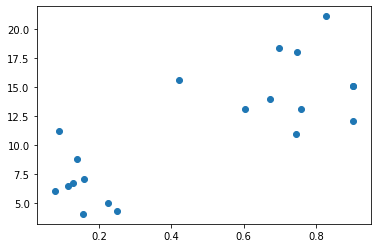

In [187]:
plt.scatter(X, y)

In [188]:
y = np.array(y)

In [189]:
y

array([ 4.10315725, 14.03081198, 10.9798055 , 18.35273815,  6.04772265,
       21.1078649 ,  4.33213127,  5.01387692, 18.00793951, 12.09390276,
       13.10123964, 13.15588039,  6.72444406, 15.0884856 ,  7.11226186,
       15.62970369,  6.51302544, 11.19512431,  8.86154232, 15.09747875])

##### **（2）使用sklearn进行regression及可视化**

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
### A.reshape（a,b）
# 表示把A拆成a行b列的数组
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [192]:
X.reshape(-1, 1)

array([[0.15695203],
       [0.67394119],
       [0.7447616 ],
       [0.69796553],
       [0.07818826],
       [0.82894514],
       [0.24866651],
       [0.22491619],
       [0.74686116],
       [0.90253006],
       [0.60457012],
       [0.75790152],
       [0.12868986],
       [0.90212579],
       [0.15763148],
       [0.42012714],
       [0.11291235],
       [0.08918838],
       [0.13892107],
       [0.90279692]])

In [193]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [194]:
reg.score(X.reshape(-1, 1), y)

0.6141337805006132

In [195]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

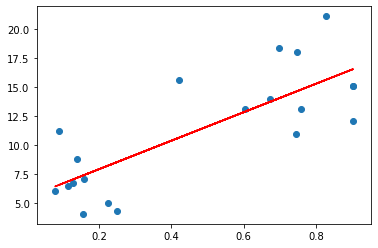

In [196]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

##### **（3）预测新的数据**

In [197]:
x_new = 0.3
x_new = np.array(x_new)
reg.predict(x_new.reshape(-1,1))

array([9.17104706])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

##### **(1) 使用pure Python完成KNN模型**

In [198]:
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [199]:
from scipy.spatial.distance import cosine

In [200]:
def distance(x1, x2):
    #return cosine(x1, x2)
    #二维数据用x之间的绝对值表示distance比较好
    return abs(x1-x2)

In [201]:
def predict(x, k=5):
    # 在predicate的时候，需要做大量的计算
    # 对model(X, y)排序，排序依据是distance(xi[0], x)，返回的还是(x,y),xi[0]表示取出[(x1,y1),(x2,y2),...]中的x
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]  
    
    print(most_similars)
    
    return np.mean(y_hats)
    # -> regression: numerical -> most_similars (y)
    # -> classification: categorical -> most_similar (y)
    
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了

In [202]:
X, y

(array([0.15695203, 0.67394119, 0.7447616 , 0.69796553, 0.07818826,
        0.82894514, 0.24866651, 0.22491619, 0.74686116, 0.90253006,
        0.60457012, 0.75790152, 0.12868986, 0.90212579, 0.15763148,
        0.42012714, 0.11291235, 0.08918838, 0.13892107, 0.90279692]),
 array([ 4.10315725, 14.03081198, 10.9798055 , 18.35273815,  6.04772265,
        21.1078649 ,  4.33213127,  5.01387692, 18.00793951, 12.09390276,
        13.10123964, 13.15588039,  6.72444406, 15.0884856 ,  7.11226186,
        15.62970369,  6.51302544, 11.19512431,  8.86154232, 15.09747875]))

In [203]:
myself_knn = model(X, y)

##### **（2) 预测新的数据**

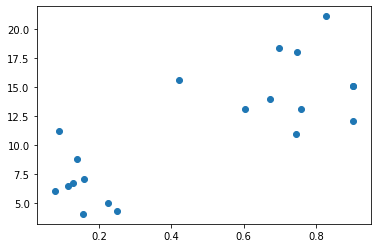

In [204]:
plt.scatter(X, y)

In [205]:
predict(0.3)

[(0.24866651277435803, 4.332131271176397), (0.224916187774983, 5.013876916184772), (0.4201271409490046, 15.629703688716662), (0.15763148204545574, 7.112261859409108), (0.15695203336124453, 4.103157247040677)]


7.238226196505524

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

##### **（1）实现信息熵**
$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

In [206]:
from collections import Counter

In [207]:
!pip install icecream

In [208]:
from icecream import ic

In [209]:
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [210]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [211]:
entropy([1, 1, 1, 0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [212]:
entropy([2, 3, 3, 4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [213]:
ic(entropy([1, 2, 3, 4]))

ic| probs: [0.25, 0.25, 0.25, 0.25]
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in an interpreter (e.g. python -i), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


1.3862943611198906

##### **(2) 生成数据**

In [214]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [215]:
import pandas as pd

In [216]:
dataset = pd.DataFrame.from_dict(mock_data)

In [217]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


##### **（3）决策树模型**

**思路：**
+ 找到第一个$salient$ $feature$
+ 根据第一个$salient$ $feature$切割数据集，得到分数据集
+ 对每个分数据集重复上面两个步骤，直到没有$feature$可以分割

**需要注意的地方**
+ 用到了函数递归
+ 注意函数何时跳出递归（即$base$的情况）
+ $base$和$base$情况下分别如何设定返回值
+ 分类结果是怎样以字典形式保存的

In [218]:
set(dataset.columns.tolist()) - {'bought'}

{'family_number', 'gender', 'income'}

In [219]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter
    

In [220]:
def createTree(training_data,target):
    x_field = set(training_data.columns.tolist()) - {target}
    # 如果x_field为空，那么则表示已经遍历了所有的分类变量，也就是到了最后一层，此时返回target的值
    if not x_field:
        return list(training_data[target])[0]
    # find the first sailent
    bestFeature = find_the_optimal_spilter(training_data,target)[0]
    # 分类结果以字典形式保存
    myTree={bestFeature:{}}
    # split the dataset
    values = set(training_data[bestFeature])
    for value in values:
        subDataSet = splitDataSet(training_data,bestFeature,value)
        myTree[bestFeature][value]=createTree(subDataSet,target)
    return myTree

In [221]:
def splitDataSet(formal_data,feature_splited_by,value_splited_by):
    '''
    formal_data：需要被分割的数据集
    feature_splited_by：分割数据集所需要的feature
    '''
    sub_dataframe = formal_data[formal_data[feature_splited_by] == value_splited_by].drop(feature_splited_by,axis=1)
    return sub_dataframe
    # 先获得feature_splited_by的所有unique值
    #values = set(formal_data[feature_splited_by])
    #for unique_value in values:

In [222]:
find_the_optimal_spilter(dataset, 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]
ic| f: 'family_number'
ic| values: {1, 2}
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]


spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [223]:
tree = createTree(dataset, 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]
ic| f: 'family_number'
ic| values: {1, 2}
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic|

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


 probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [0.75, 0.25]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [0.5, 0.5]


spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.5, 0.5]
ic| f: 'gender'
ic| values: {'F'}
ic| probs: [1.0]


spliter is: ('gender', 'M')
the min entropy is: 0.6931471805599453


ic| probs: []
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [1.0]
ic| probs: [1.0]


spliter is: ('gender', 'F')
the min entropy is: 0.0


ic| probs: [1.0]
ic| probs: [1.0]
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]
ic| f: 'gender'
ic| values: {'F'}
ic| probs: [1.0]


spliter is: ('income', '-10')
the min entropy is: -0.0


ic| probs: []
ic| f: 'gender'
ic| values: {'M'}
ic|

spliter is: ('gender', 'F')
the min entropy is: 0.0


 probs: [1.0]
ic| probs: []


spliter is: ('gender', 'M')
the min entropy is: 0.0


In [224]:
tree

{'family_number': {1: {'income': {'+10': {'gender': {'F': 1, 'M': 0}},
    '-10': {'gender': {'F': 1}}}},
  2: {'income': {'+10': {'gender': {'F': 1}}, '-10': {'gender': {'M': 1}}}}}}

##### **（4）根据字典结构画出决策树**

> 代码借鉴：
> + https://blog.csdn.net/u012421852/article/details/79801466

In [225]:
import matplotlib.pyplot as plt
 
#定义判断结点形状,其中boxstyle表示文本框类型,fc指的是注释框颜色的深度
decisionNode = dict(boxstyle="round4", color='r', fc='0.9')
#定义叶结点形状
leafNode = dict(boxstyle="circle", color='m')
#定义父节点指向子节点或叶子的箭头形状
arrow_args = dict(arrowstyle="<-", color='g')
 
def plot_node(node_txt, center_point, parent_point, node_style):
    '''
    绘制父子节点，节点间的箭头，并填充箭头中间上的文本
    :param node_txt:文本内容
    :param center_point:文本中心点
    :param parent_point:指向文本中心的点
    '''
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_point,
                            xycoords='axes fraction',
                            xytext=center_point,
                            textcoords='axes fraction',
                            va="center",
                            ha="center",
                            bbox=node_style,
                            arrowprops=arrow_args)
 
def get_leafs_num(tree_dict):
    '''
    获取叶节点的个数
    :param tree_dict:树的数据字典
    :return tree_dict的叶节点总个数
    '''
    #tree_dict的叶节点总数
    leafs_num = 0
    
    #字典的第一个键，也就是树的第一个节点
    root = list(tree_dict.keys())[0]
    #这个键所对应的值，即该节点的所有子树。
    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__=='dict':
            #子树是字典型，则当前树的叶节点数加上此子树的叶节点数
            leafs_num += get_leafs_num(child_tree_dict[key])
        else:
            #子树不是字典型，则当前树的叶节点数加1
            leafs_num += 1
 
    #返回tree_dict的叶节点总数
    return leafs_num
 
def get_tree_max_depth(tree_dict):
    '''
    求树的最深层数
    :param tree_dict:树的字典存储
    :return tree_dict的最深层数
    '''
    #tree_dict的最深层数
    max_depth = 0
    
    #树的根节点
    root = list(tree_dict.keys())[0]
    #当前树的所有子树的字典
    child_tree_dict = tree_dict[root]
    
    for key in child_tree_dict.keys():
        #树的当前分支的层数
        this_path_depth = 0
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__ == 'dict':
            #如果子树是字典型，则当前分支的层数需要加上子树的最深层数
            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:
            #如果子树不是字典型，则是叶节点，则当前分支的层数为1
            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth
    
    #返回tree_dict的最深层数
    return max_depth
 
def plot_mid_text(center_point, parent_point, txt_str):
    '''
    计算父节点和子节点的中间位置，并在父子节点间填充文本信息
    :param center_point:文本中心点
    :param parent_point:指向文本中心点的点
    '''
    
    x_mid = (parent_point[0] - center_point[0])/2.0 + center_point[0]
    y_mid = (parent_point[1] - center_point[1])/2.0 + center_point[1]
    createPlot.ax1.text(x_mid, y_mid, txt_str)
    return
 
def plotTree(tree_dict, parent_point, node_txt):
    '''
    绘制树
    :param tree_dict:树
    :param parent_point:父节点位置
    :param node_txt:节点内容
    '''
    
    leafs_num = get_leafs_num(tree_dict)
    root = list(tree_dict.keys())[0]
    #plotTree.totalW表示树的深度
    center_point = (plotTree.xOff+(1.0+float(leafs_num))/2.0/plotTree.totalW,plotTree.yOff)
    #填充node_txt内容
    plot_mid_text(center_point, parent_point, node_txt)
    #绘制箭头上的内容
    plot_node(root, center_point, parent_point, decisionNode)
    #子树
    child_tree_dict = tree_dict[root]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    #因从上往下画，所以需要依次递减y的坐标值，plotTree.totalD表示存储树的深度
    for key in child_tree_dict.keys():
        if type(child_tree_dict[key]).__name__ == 'dict':
            plotTree(child_tree_dict[key],center_point,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plot_node(child_tree_dict[key],(plotTree.xOff,plotTree.yOff),center_point,leafNode)
            plot_mid_text((plotTree.xOff,plotTree.yOff),center_point,str(key))
    #h绘制完所有子节点后，增加全局变量Y的偏移
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
 
    return
 
def createPlot(tree_dict):
    '''
    绘制决策树图形
    :param tree_dict
    :return 无
    '''
    #设置绘图区域的背景色
    fig=plt.figure(1,facecolor='white')
    #清空绘图区域
    fig.clf()
    #定义横纵坐标轴,注意不要设置xticks和yticks的值!!!
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1=plt.subplot(111, frameon=False, **axprops)
    #由全局变量createPlot.ax1定义一个绘图区，111表示一行一列的第一个，frameon表示边框,**axprops不显示刻度
    plotTree.totalW=float(get_leafs_num(tree_dict))
    plotTree.totalD=float(get_tree_max_depth(tree_dict))
    plotTree.xOff=-0.5/plotTree.totalW;
    plotTree.yOff=1.0;
    plotTree(tree_dict, (0.5,1.0), '')
    plt.show()

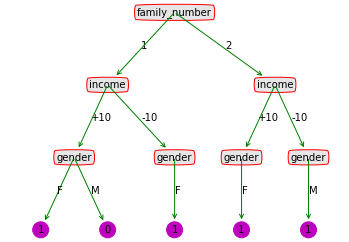

In [226]:
    createPlot(tree)

In [227]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

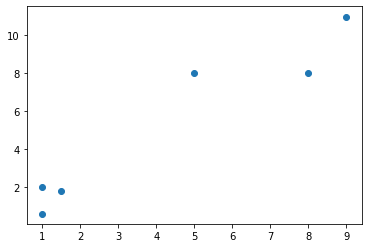

In [228]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot
 
# 要分类的数据点
x = np.array([ [1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11] ])
pyplot.scatter(x[:,0], x[:,1])

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 0 1 1 0 1]


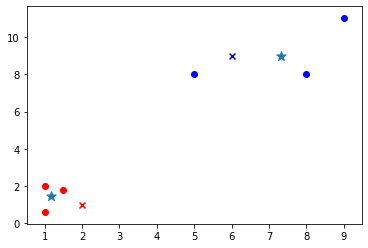

In [229]:
# 把上面数据点分为两组（非监督学习）
clf = KMeans(n_clusters=2)
clf.fit(x)  # 分组
 
centers = clf.cluster_centers_ # 两组数据点的中心点
labels = clf.labels_   # 每个数据点所属分组
print(centers)
print(labels)
 
for i in range(len(labels)):
    pyplot.scatter(x[i][0], x[i][1], c=('r' if labels[i] == 0 else 'b'))
pyplot.scatter(centers[:,0],centers[:,1],marker='*', s=100)
 
# 预测
predict = [[2,1], [6,9]]
label = clf.predict(predict)
for i in range(len(label)):
    pyplot.scatter(predict[i][0], predict[i][1], c=('r' if label[i] == 0 else 'b'), marker='x')
 
pyplot.show()

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:
1. 模型是现实世界数据特征的抽象
2. 我们想通过模型来表示或获得现实世界的信息，但是没有模型能够完全准确地反映现实世界，但是有些模型可以更可能地接近真实的情况

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:
1. 欠拟合
- 欠拟合是指模型拟合程度不高，数据距离拟合曲线较远，或指模型没有很好地捕捉到数据特征，不能够很好地拟合数据。在训练集和测试集上都表现糟糕。
- 欠拟合的原因
   - 特征量过少
   - 模型复杂度过低
2. 过拟合
- 过拟合是在训练集上表现良好，而在测试集上表现糟糕
- 过拟合的原因
   - 训练集和测试集特征分布不一致
   - 数据噪声太大
   - 数据量太小
   - 特征量太多
   - 模型太过复杂

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

|||
|---|---|
|TP|True Positive （真正, TP）被模型预测为正的正样本；可以称作判断为真的正确率 |
|FP|True Negative（真负 , TN）被模型预测为负的负样本 ；可以称作判断为假的正确率 |
|TN|False Positive （假正, FP）被模型预测为正的负样本；可以称作误报率 | 
|FN|False Negative（假负 , FN）被模型预测为负的正样本；可以称作漏报率 |

|指标|----定义------|侧重点|
|---|---|---|
|precision|$P=\frac{TP}{(TP+FP)}$|是针对我们预测结果而言的，它表示的是预测为正的样本中有多少是真正的正样本|
|recall|$R=\frac{TP}{(TP+FN)}$|是针对我们原来的样本而言的，它表示的是样本中的正例有多少被预测正确了|
|F1|$\frac{2}{(\frac{1}{P}+\frac{1}{R})}$|precision和recall在实际中两者是相互制约的。我们都希望模型的精确了和召回率都很高，但是当精确率高的时候，召回率往往较低；召回率较高的时候精确率往往较低。很多时候，我们需要综合权衡这2个指标，这就引出了一个新的指标F-Score，这是综合考虑Precision和Recall的调和值。精确率和召回率都高时，$F_1$值也会高。|

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:
- 机器学习是一种能够赋予机器学习的能力以此让它完成直接编程无法完成的功能(如果可以通过分析式编程解决问题，那也就可以不需要使用机器学习了)的方法。从实践的意义上来说，机器学习是一种通过利用数据，训练出模型，然后使用模型预测的一种方法。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

- 同意这句话的观点。
- 建立机器学习模型的想法是基于一个建设性的反馈原则。构建一个模型，从指标中获得反馈，进行改进，直到达到理想的精度为止。评估指标解释了模型的性能。评估指标的一个重要方面是它们区分模型结果的能力。仅仅关注模型的构建而不注重模型的鲁棒性是错误的。
- 我们的动机不是简单地建立一个预测模型。它是关于创建和选择一个模型，使其对样本外的数据具有高精度。因此，在计算预测值之前，检查模型的准确性是至关重要的。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

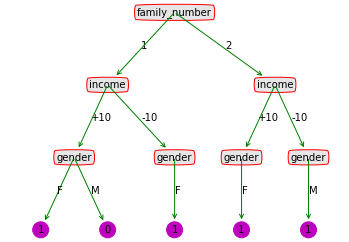

In [230]:
 createPlot(tree)

In [231]:
tree

{'family_number': {1: {'income': {'+10': {'gender': {'F': 1, 'M': 0}},
    '-10': {'gender': {'F': 1}}}},
  2: {'income': {'+10': {'gender': {'F': 1}}, '-10': {'gender': {'M': 1}}}}}}

In [232]:
test_dict = {
    'gender':'M',
    'income':'+10',
    'family_number':1
}

In [233]:
test_dict1 = {
    'gender':'M',
    'income':'-10',
    'family_number':1
}

In [234]:
def get_tree_result(tree_dict,test_dict):
    
    # 字典的第一个键，也就是树的第一个节点
    root = list(tree_dict.keys())[0]
    #这个键所对应的值，即该节点的所有子树。
    child_tree_dict =tree_dict[root]
    
    # 如果只有一个选项，那么返回那一个选项所对应的值   （*） **base的情况1
    if len(child_tree_dict.keys()) == 1:
        key = list(child_tree_dict.keys())[0] #'dict_keys' object is not subscriptable,所以要list
        return child_tree_dict[key]
 
    for key in child_tree_dict.keys():
        print(key)
        #检测子树是否字典型（如果不是，则代表已经进入到决策树的最深层）  **base的情况2
        if type(child_tree_dict[key]).__name__!='dict' and key == test_dict[root]:
            return child_tree_dict[key]
        if key == test_dict[root]:
            # 进入下一级字典
            print(tree_dict[root][key])
            tree_dict = tree_dict[root][key]
            # 递归
            tree_dict = get_tree_result(tree_dict,test_dict)
            return tree_dict

In [235]:
get_tree_result(tree,test_dict) # 分类正确

1
{'income': {'+10': {'gender': {'F': 1, 'M': 0}}, '-10': {'gender': {'F': 1}}}}
+10
{'gender': {'F': 1, 'M': 0}}
F
M


0

In [236]:
get_tree_result(tree,test_dict1) 
# 如果get_tree_result函数中没有（*），那么这个分类则不会进行下去，原因是tree中按family=1,income='-10'后没有gender=M的选项

1
{'income': {'+10': {'gender': {'F': 1, 'M': 0}}, '-10': {'gender': {'F': 1}}}}
+10
-10
{'gender': {'F': 1}}


1

In [237]:
def predict(training_set,target,test_dict):
    decision_tree = createTree(training_set,target)
    predict_value = get_tree_result(decision_tree,test_dict) 
    print('预测值是：' ,predict_value)
    return predict_value

In [238]:
predict(dataset,'bought',test_dict) 

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]
ic| f: 'family_number'
ic| values: {1, 2}
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]


spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


ic| probs: [1.0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [0.75, 0.25]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [0.5, 0.5]
ic

spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


| probs: [1.0]
ic| probs: [1.0]
ic| probs: [0.5, 0.5]
ic| f: 'gender'
ic| values: {'F'}
ic| probs: [1.0]
ic| probs: []
ic|

spliter is: ('gender', 'M')
the min entropy is: 0.6931471805599453
spliter is: ('gender', 'F')
the min entropy is: 0.0


 f: 'gender'
ic| values: {'F', 'M'}
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]
ic| f: 'gender'
ic| values: {'F'}
ic| probs: [1.0]
ic| probs: []


spliter is: ('income', '-10')
the min entropy is: -0.0
spliter is: ('gender', 'F')
the min entropy is: 0.0


ic| f: 'gender'
ic| values: {'M'}
ic| probs: [1.0]
ic| probs: []


spliter is: ('gender', 'M')
the min entropy is: 0.0
1
{'income': {'+10': {'gender': {'F': 1, 'M': 0}}, '-10': {'gender': {'F': 1}}}}
+10
{'gender': {'F': 1, 'M': 0}}
F
M
预测值是： 0


0

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

##### **（1）重新定义loss function**

$$ y =k*rm+b$$

In [239]:
#define target function
def price(rm, k, b):
    return k * rm + b

$$loss = J=\frac{1}{n}\sum\limits_{i = 1}^{n}|y_i - \hat y_i|$$

$$loss =J= \frac{1}{n}\sum\limits_{i = 1}^{n}|y_i - (k * x_i + b)|$$

当$y_i >\hat y_i$时： $$|y_i-\hat y|=y_i-\hat y=y_i-k*x_i-b$$

$$\frac{\partial J}{ \partial k}=-x_i$$


$$\frac{\partial J}{ \partial b}=-1$$

当$y_i <\hat y_i$时： $$|y_i-\hat y|=\hat y-y_i=k*x_i+b-y_i$$

$$\frac{\partial J}{ \partial k}=x_i$$

$$\frac{\partial J}{ \partial b}=1$$

In [240]:
# define loss function
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

##### **（2）重新定义偏导**

In [264]:
# define partial derivative
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -x_i
        else:
            gradient += x_i
    return 1/n * gradient
    
def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1
        else:
            gradient += 1
    return 1 / n * gradient

##### **（3）准备Boston数据**

In [268]:
from sklearn.datasets import load_boston
import random

In [269]:
dataset = load_boston()

In [270]:
x,y=dataset['data'],dataset['target']

In [271]:
x.shape  # 506条观测值，13个feature

(506, 13)

In [272]:
y.shape

(506,)

In [273]:
x[1]   # 一行

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [274]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [275]:
# 取前5个feature
X_rm = x[:,5]

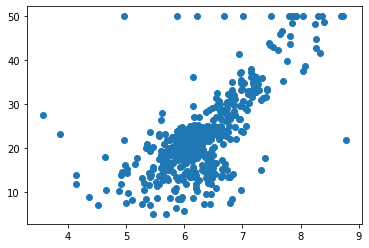

In [276]:
plt.scatter(X_rm,y)

##### **（4）进行regression**

In [277]:
#initialized parameters
k = random.random() * 200 - 100 # -100 100
b = random.random() * 200 - 100 # -100 100
learning_rate = 1e-1
iteration_num = 200
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm] # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 490.5748446984478, parameters k is -69.26712592365834 and b is -32.72347688148814
Iteration 1, the loss is 486.52518176017935, parameters k is -68.63866248492316 and b is -32.62347688148814
Iteration 2, the loss is 482.4755188219108, parameters k is -68.01019904618798 and b is -32.523476881488136
Iteration 3, the loss is 478.42585588364284, parameters k is -67.3817356074528 and b is -32.423476881488135
Iteration 4, the loss is 474.376192945374, parameters k is -66.75327216871761 and b is -32.32347688148813
Iteration 5, the loss is 470.3265300071054, parameters k is -66.12480872998243 and b is -32.22347688148813
Iteration 6, the loss is 466.2768670688367, parameters k is -65.49634529124725 and b is -32.12347688148813
Iteration 7, the loss is 462.2272041305682, parameters k is -64.86788185251207 and b is -32.02347688148813
Iteration 8, the loss is 458.1775411923006, parameters k is -64.23941841377689 and b is -31.923476881488128
Iteration 9, the loss is 454.12787

**如果loss一直在下降，但是一直没有收敛，可以尝试调高学习率$\alpha$**

##### **（5）做出拟合图像**

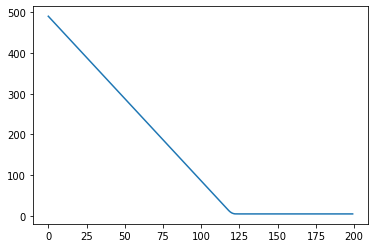

In [278]:
plt.plot(list(range(iteration_num)),losses)

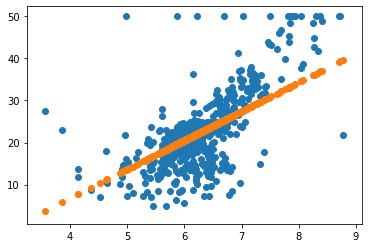

In [279]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)